## plot accumulated V changing with dp

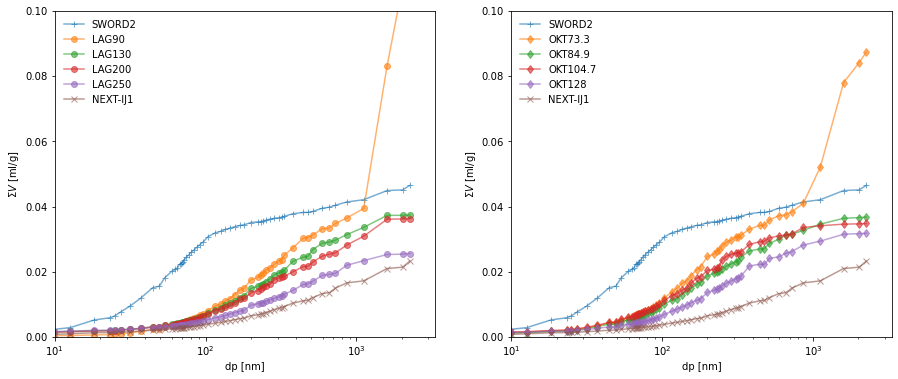

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

data_path = './all_volume_data/'
LAG_lst = ['SWORD2', 'LAG90', 'LAG130', 'LAG200', 'LAG250', 'NEXT-IJ1',]
OKT_lst =['SWORD2', 'OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128', 'NEXT-IJ1',]

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for paper in LAG_lst:
    csv_path = os.path.join(data_path, paper + '.csv')
    data = pd.read_csv(csv_path)
    ax[0].plot(data['dp/nm'], data['Sigma Vp'], marker=marker[paper], label=paper, alpha=0.6)

for paper in OKT_lst:
    csv_path = os.path.join(data_path, paper + '.csv')
    data = pd.read_csv(csv_path)
    ax[1].plot(data['dp/nm'], data['Sigma Vp'], marker=marker[paper], label=paper, alpha=0.6)
    
for i in range(2):
    ax[i].legend(loc='best', frameon=False)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('dp [nm]')
    ax[i].set_ylabel('$\Sigma V$ [ml/g]')
    ax[i].set_xlim(10)
    ax[i].set_ylim(0, 0.1)
# leg.get_frame().set_edgecolor('black') 
plt.show()

## original data $ \frac{dV}{d\log{D}} $

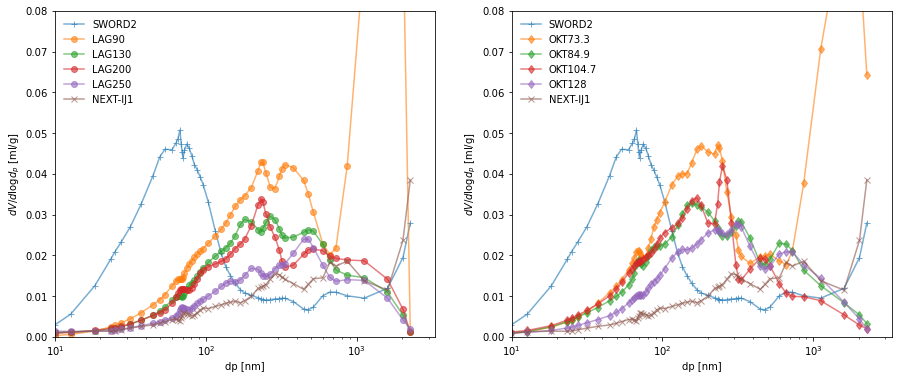

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = './all_raw_data.csv'
data = pd.read_csv(data_path)

LAG_lst = ['SWORD2', 'LAG90', 'LAG130', 'LAG200', 'LAG250', 'NEXT-IJ1']
OKT_lst =['SWORD2', 'OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128', 'NEXT-IJ1']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}

for paper in LAG_lst:
    ax[0].plot(data['dp/nm'], data[paper], label=paper, marker=marker[paper], alpha=0.6)

for paper in OKT_lst:
    ax[1].plot(data['dp/nm'], data[paper], label=paper, marker=marker[paper], alpha=0.6)
    
for i in range(2):
    ax[i].legend(loc='best', frameon=False)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('dp [nm]')
    ax[i].set_ylabel('$dV / d \log{d_p}$ [ml/g]')
    ax[i].set_xlim(10)
    ax[i].set_ylim(0, 0.08)
plt.show()

## deleted data $ \frac{dV}{d\log{D}} $

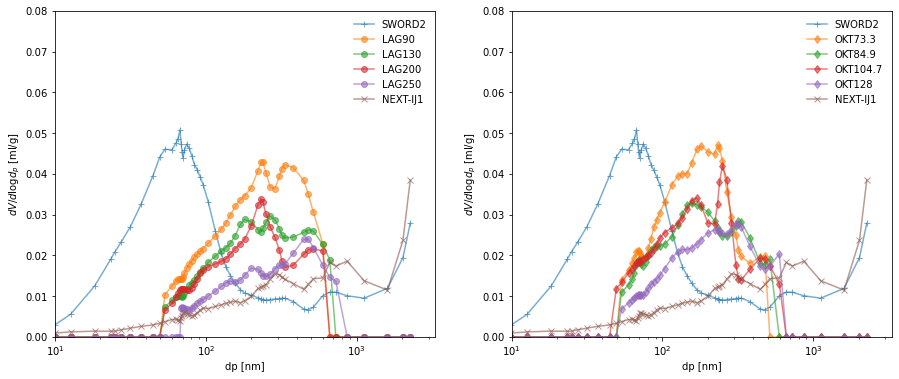

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = './all_raw_data_deleted.csv'
data = pd.read_csv(data_path)

LAG_lst = ['SWORD2', 'LAG90', 'LAG130', 'LAG200', 'LAG250', 'NEXT-IJ1']
OKT_lst =['SWORD2', 'OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128', 'NEXT-IJ1']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}

for paper in LAG_lst:
    ax[0].plot(data['dp/nm'], data[paper], label=paper, marker=marker[paper], alpha=0.6)

for paper in OKT_lst:
    ax[1].plot(data['dp/nm'], data[paper], label=paper, marker=marker[paper], alpha=0.6)
    
for i in range(2):
    ax[i].legend(loc='best', frameon=False)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('dp [nm]')
    ax[i].set_ylabel('$dV / d \log{d_p}$ [ml/g]')
    ax[i].set_xlim(10)
    ax[i].set_ylim(0, 0.08)
plt.show()

## Gaussian fitting of deleted data

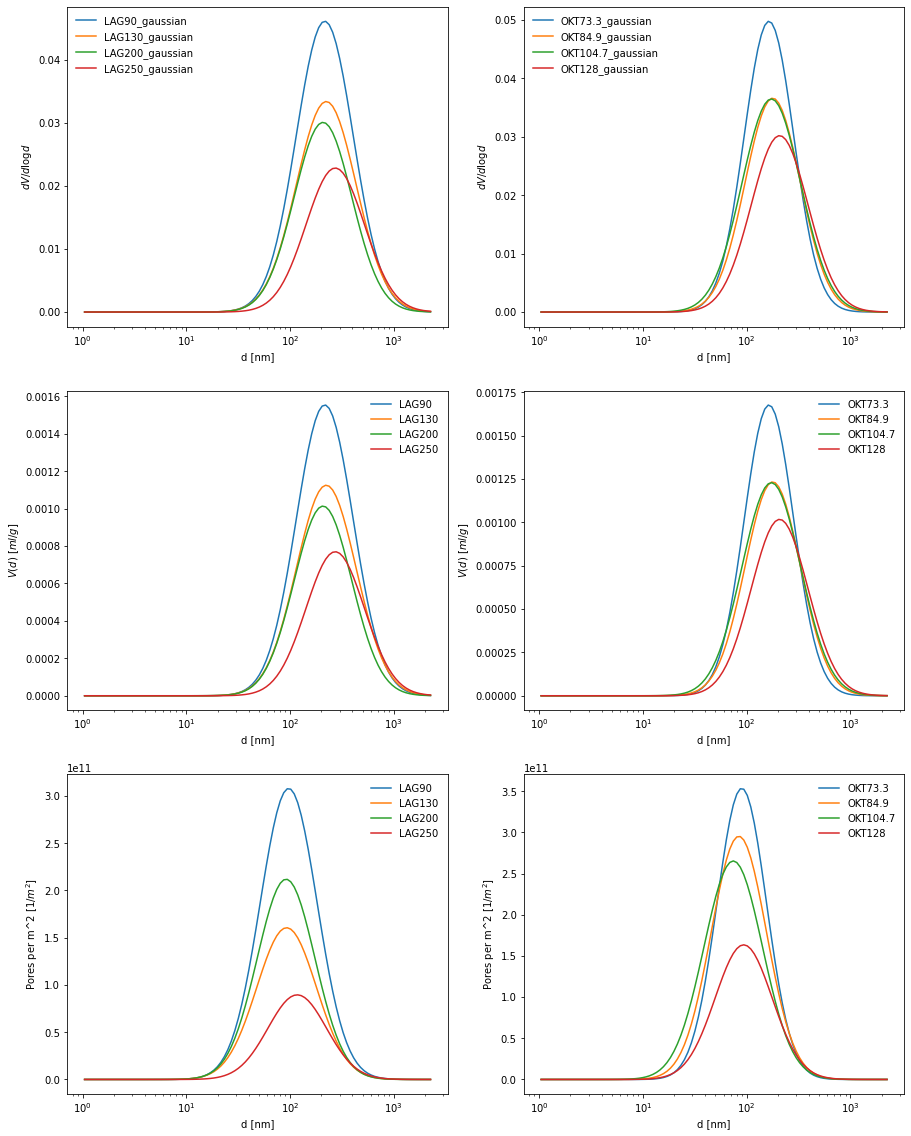

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilts import pores_distribution, pores_distribution_test

data_path = './All_raw_data_deleted.csv'
data = pd.read_csv(data_path)

LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]

fig, ax = plt.subplots(3, 2, figsize=(15, 20))

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}

# num = {'LAG90': 1650, 'LAG130': 1400, 'LAG200': 1150, 'LAG250': 1600, 
#           'OKT73.3': 1050, 'OKT84.9': 1100, 'OKT104.7': 1200, 'OKT128': 1300}

inter = 100
num = {'LAG90': inter, 'LAG130': inter, 'LAG200': inter, 'LAG250': inter, 
          'OKT73.3': inter, 'OKT84.9': inter, 'OKT104.7': inter, 'OKT128': inter}

for k, paper in enumerate(LAG_lst):
    result = pd.DataFrame()
    d_new, dVdlogD, VD, n = pores_distribution_test(data['dp/nm'], data[paper], paper, num[paper])
    ax[0][0].plot(d_new, dVdlogD, label=paper+'_gaussian',)
    ax[1][0].plot(d_new, VD, label=paper,)
    ax[2][0].plot(d_new, n, label=paper,)
    result['d'] = d_new
    result['dVdlogD'] = dVdlogD
    result['VD'] = VD
    result['n'] = n
    result.to_csv(f'processed_data_{inter}/' + paper + '.csv', index=False)
    
for k, paper in enumerate(OKT_lst):
    result = pd.DataFrame()
    d_new, dVdlogD, VD, n = pores_distribution_test(data['dp/nm'], data[paper], paper, num[paper])
    ax[0][1].plot(d_new, dVdlogD, label=paper+'_gaussian', )
    ax[1][1].plot(d_new, VD, label=paper, )
    ax[2][1].plot(d_new, n, label=paper, )
    result['d'] = d_new
    result['dVdlogD'] = dVdlogD
    result['VD'] = VD
    result['n'] = n
    result.to_csv(f'processed_data_{inter}/' + paper + '.csv', index=False)

for i in range(3):
    for j in range(2):
        ax[i][j].legend(loc='best', frameon=False)
        ax[i][j].set_xscale('log')
        if i == 0:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('$dV / d \log{d}$')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim(0, 0.08)
        elif i == 1:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('$V(d)$ [$ml/g$]')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim(0, 0.08)
        elif i == 2:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('Pores per m^2 [$1/m^2$]')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim()           
plt.savefig("./processed_data_100/results.png", dpi=300)
plt.show()

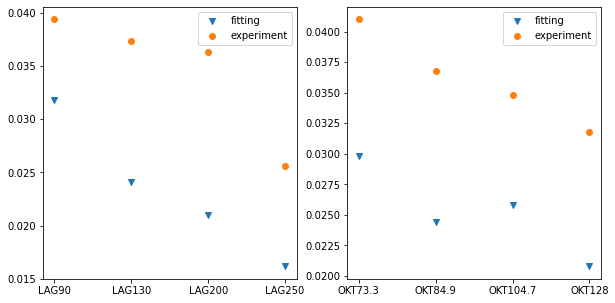

error rate of LAG is  ['19.34630091901952%', '35.53518246055347%', '42.24354840763487%', '36.91137707274988%']
error rate of OKT is  ['27.359162453122256%', '33.56380262679422%', '25.77549219126466%', '34.66063963246667%']


In [1]:
import pandas as pd
from utilts import paper_dict
import matplotlib.pyplot as plt

LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]
data_dir = './processed_data_100/'

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fitting_lst = []
exp_lst= []
for paper in LAG_lst:
    df = pd.read_csv(data_dir + paper + '.csv')
    fitting_lst.append(df['VD'].sum())
    exp_lst.append(paper_dict[paper]['sigma_v'])
    
ax[0].scatter(LAG_lst, fitting_lst, marker = 'v', label='fitting')
ax[0].scatter(LAG_lst, exp_lst, label='experiment')
error1 = [str(abs(fitting_lst[i] - exp_lst[i]) / exp_lst[i] * 100)+'%' for i in range(len(fitting_lst))]

fitting_lst = []
exp_lst= []
for paper in OKT_lst:
    df = pd.read_csv(data_dir + paper + '.csv')
    fitting_lst.append(df['VD'].sum())
    exp_lst.append(paper_dict[paper]['sigma_v'])
    
ax[1].scatter(OKT_lst, fitting_lst, marker = 'v', label='fitting')
ax[1].scatter(OKT_lst, exp_lst, label='experiment')
error2 = [str(abs(fitting_lst[i] - exp_lst[i]) / exp_lst[i] * 100)+'%' for i in range(len(fitting_lst))]

for i in range(2):
    ax[i].legend(frameon=True)
plt.show()

print("error rate of LAG is ", error1)
print("error rate of OKT is ", error2)

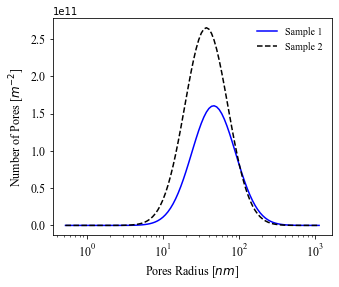

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilts import pores_distribution, pores_distribution_test

l130 = pd.read_csv("./processed_data_100/LAG130.csv")
o104 = pd.read_csv("./processed_data_100/OKT104.7.csv")

font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(figsize=(5, 4))

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}

ax.plot(l130["d"]/2, l130["n"], "b", label = "Sample 1")
ax.plot(o104["d"]/2, o104["n"], "k--", label = "Sample 2")


legend_labels = ax.legend(loc="best", frameon=False).get_texts()
[label.set_fontname('Times New Roman') for label in legend_labels]

ax.set_xlabel("Pores Radius [$nm$]", font)
ax.set_ylabel("Number of Pores [$m^{-2}$]", font)

plt.tick_params(labelsize=12)
tick_labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in tick_labels]

ax.set_xscale('log')

plt.savefig("../../pores_distribution.svg", dpi=500)
plt.show()

## Gaussian fitting of original data (noise point deleted)

0.20724493981243242
0.11193855102742466
0.1310349495501784
0.09433812774168245


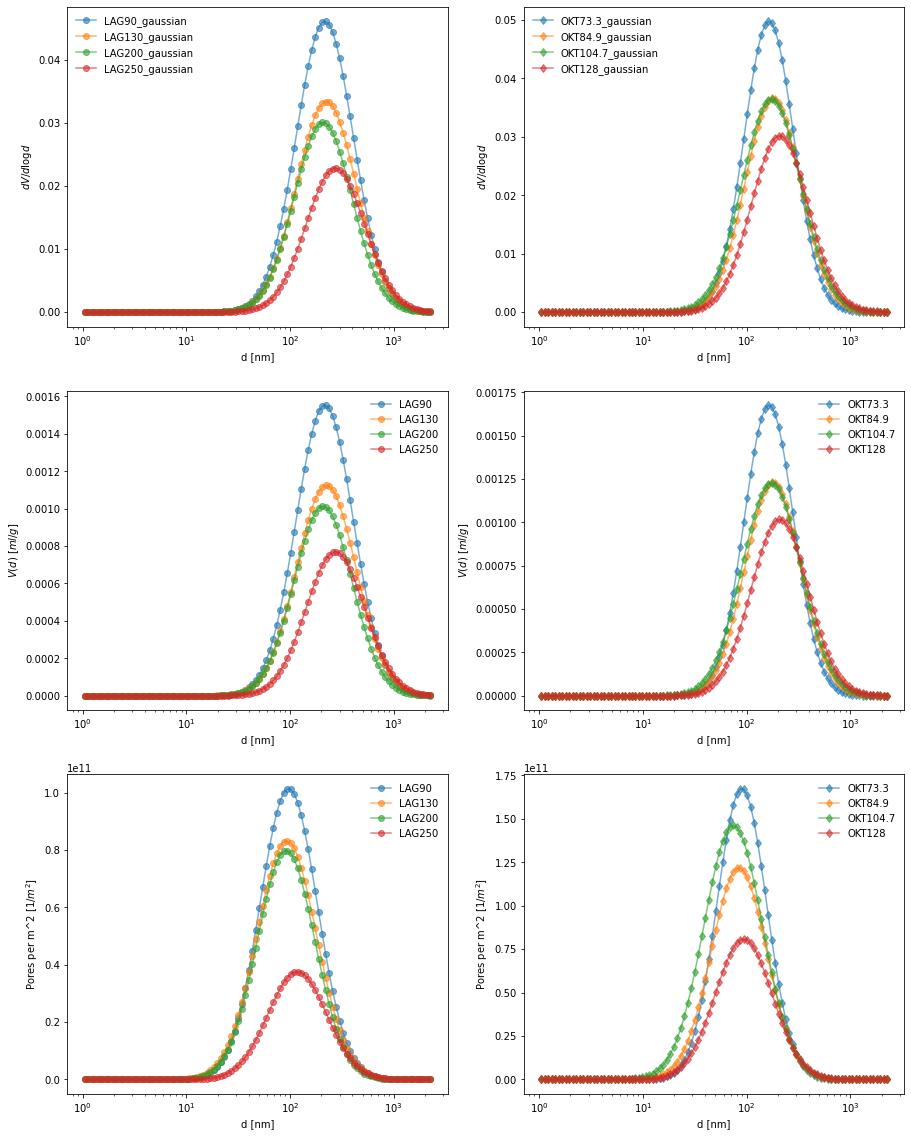

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilts import pores_distribution

data_path = './All_raw_data_deleted.csv'
data = pd.read_csv(data_path)

LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]

fig, ax = plt.subplots(3, 2, figsize=(15, 20))

marker = {'LAG90':'o', 'LAG130':'o', 'LAG200':'o', 'LAG250':'o', 
          'OKT73.3':'d', 'OKT84.9':'d', 'OKT104.7':'d', 'OKT128':'d',
          'NEXT-IJ1':'x', 'NEXT-IJ2':'x', 'SWORD1':'+', 'SWORD2':'+'}

inter = 100
num = {'LAG90': inter, 'LAG130': inter, 'LAG200': inter, 'LAG250': inter, 
          'OKT73.3': inter, 'OKT84.9': inter, 'OKT104.7': inter, 'OKT128': inter}

for k, paper in enumerate(LAG_lst):
    result = pd.DataFrame()
    d_new, dVdlogD, VD, n, porosity = pores_distribution(data['dp/nm'], data[paper], paper, num[paper])
    ax[0][0].plot(d_new, dVdlogD, label=paper+'_gaussian', marker=marker[paper], alpha=0.6)
    ax[1][0].plot(d_new, VD, label=paper, marker=marker[paper], alpha=0.6)
    ax[2][0].plot(d_new, n, label=paper, marker=marker[paper], alpha=0.6)

    result['d'] = d_new
    result['dVdlogD'] = dVdlogD
    result['VD'] = VD
    result['n'] = n
    result.to_csv('processed_data_nishimura/' + paper + '.csv', index=False)
    print(porosity)
    
for k, paper in enumerate(OKT_lst):
    d_new, dVdlogD, VD, n, porosity = pores_distribution(data['dp/nm'], data[paper], paper, num[paper])
    ax[0][1].plot(d_new, dVdlogD, label=paper+'_gaussian', marker=marker[paper], alpha=0.6)
    ax[1][1].plot(d_new, VD, label=paper, marker=marker[paper], alpha=0.6)
    ax[2][1].plot(d_new, n, label=paper, marker=marker[paper], alpha=0.6)
    
    result['d'] = d_new
    result['dVdlogD'] = dVdlogD
    result['VD'] = VD
    result['n'] = n
    result.to_csv('processed_data_nishimura/' + paper + '.csv', index=False)

for i in range(3):
    for j in range(2):
        ax[i][j].legend(loc='best', frameon=False)
        ax[i][j].set_xscale('log')
        if i == 0:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('$dV / d \log{d}$')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim(0, 0.08)
        elif i == 1:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('$V(d)$ [$ml/g$]')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim(0, 0.08)
        elif i == 2:
            ax[i][j].set_xlabel('d [nm]')
            ax[i][j].set_ylabel('Pores per m^2 [$1/m^2$]')
#             ax[i][j].set_xlim(10)
#             ax[i][j].set_ylim()           

plt.show()

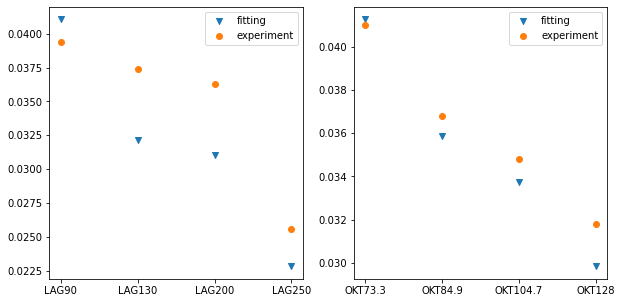

error rate of LAG is  ['0.6343450352004959%', '2.5462293683436212%', '3.04849162930891%', '6.165959058159852%']
error rate of OKT is  ['27.36955519142165%', '33.614869878525454%', '25.768293586093822%', '34.62359570959844%']


In [8]:
import pandas as pd
from utilts import paper_dict
import matplotlib.pyplot as plt


LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]
data_dir = './processed_data_no_delete/'

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fitting_lst = []
exp_lst= []
for paper in LAG_lst:
    df = pd.read_csv(data_dir + paper + '.csv')
    fitting_lst.append(df['VD'].sum())
    exp_lst.append(paper_dict[paper]['sigma_v'])
    
ax[0].scatter(LAG_lst, fitting_lst, marker = 'v', label='fitting')
ax[0].scatter(LAG_lst, exp_lst, label='experiment')
error1 = [str(abs(fitting_lst[i] - exp_lst[i]) / exp_lst[i] * 100)+'%' for i in range(len(fitting_lst))]


fitting_lst = []
exp_lst= []
for paper in OKT_lst:
    df = pd.read_csv(data_dir + paper + '.csv')
    fitting_lst.append(df['VD'].sum())
    exp_lst.append(paper_dict[paper]['sigma_v'])
    
ax[1].scatter(OKT_lst, fitting_lst, marker = 'v', label='fitting')
ax[1].scatter(OKT_lst, exp_lst, label='experiment')
error1 = [str(abs(fitting_lst[i] - exp_lst[i]) / exp_lst[i] * 100)+'%' for i in range(len(fitting_lst))]


for i in range(2):
    ax[i].legend(frameon=True)
plt.show()

print("error rate of LAG is ", error1)
print("error rate of OKT is ", error2)

## effect of interpolation numbers

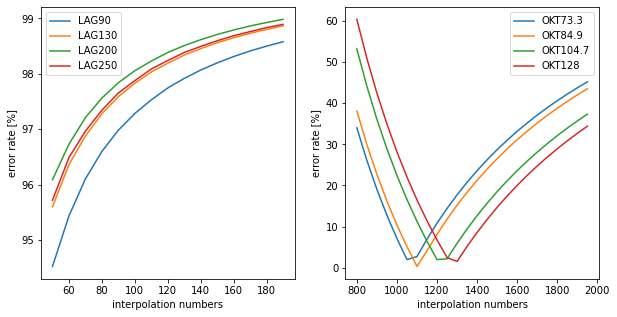

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilts import pores_distribution_original, paper_dict

data_path = './all_raw_data_deleted.csv'
data = pd.read_csv(data_path)

LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))


for k, paper in enumerate(LAG_lst):
    num_lst = []
    fitting_error = []
    for num in range(50, 200, 10):
        d_new, dVdlogD, VD, n = pores_distribution_original(data['dp/nm'], data[paper], paper, num)
        tmp = []
        for i in range(len(VD)-1):
            tmp.append(VD[i] * (np.log10(d_new[i+1]) - np.log10(d_new[i])))
        num_lst.append(num)
        fitting_error.append(abs(sum(tmp) - paper_dict[paper]['sigma_v']) / paper_dict[paper]['sigma_v'] * 100)
    ax[0].plot(num_lst, fitting_error, label=paper)
        


for k, paper in enumerate(OKT_lst):
    num_lst = []
    fitting_error = []
    for num in range(800, 2000, 50):
        d_new, dVdlogD, VD, n = pores_distribution_original(data['dp/nm'], data[paper], paper, num)
        tmp = []
        for i in range(len(VD)-1):
            tmp.append(VD[i] * (d_new[i+1] - d_new[i]))
        num_lst.append(num)
        fitting_error.append(abs(sum(tmp) - paper_dict[paper]['sigma_v']) / paper_dict[paper]['sigma_v'] * 100)
    ax[1].plot(num_lst, fitting_error, label=paper)

    
for i in range(2):
    ax[i].legend(frameon=True)
    ax[i].set_xlabel("interpolation numbers")
    ax[i].set_ylabel("error rate [%]")
plt.show()

[1944723499133.7104, 1660285200218.1199, 1469724986151.532, 741843495740.5216]


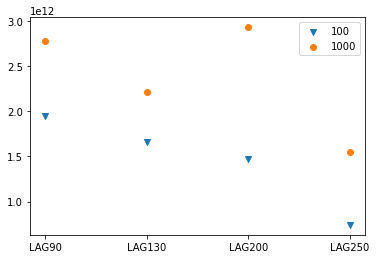

[2779346871301.314, 2214381570144.132, 2931187128386.872, 1549903565687.87]


In [20]:
import pandas as pd
from utilts import paper_dict
import matplotlib.pyplot as plt


LAG_lst = ['LAG90', 'LAG130', 'LAG200', 'LAG250',]
OKT_lst =['OKT73.3', 'OKT84.9', 'OKT104.7', 'OKT128',]
data_dir1 = './processed_data_100/'
data_dir2 = './processed_data_1000/'

res = []
plt.figure()
for paper in LAG_lst:
    df1 = pd.read_csv(data_dir1 + paper + '.csv')
    res.append(df1['n'].sum())
plt.scatter(LAG_lst, res, marker = 'v', label='100')
print(res)

res = []
for paper in OKT_lst:
    df2 = pd.read_csv(data_dir2 + paper + '.csv')
    res.append(df2['n'].sum())
plt.scatter(LAG_lst, res, marker = 'o', label='1000')
plt.legend()
plt.show()
print(res)
